In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
import random
import torch.nn.functional as F
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = 'drive/MyDrive/AVII/'

words = open(PATH + 'names.txt', 'r').read().splitlines()

In [ ]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
chars = sorted(list(set(''.join(words))))
chars = ['.'] + chars
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for s,i in stoi.items()}

In [ ]:
Ne = 2 # dimension of the embedding
C = torch.randn((76, Ne))

In [ ]:
# Building the training, dev/validation and test datasets
# Split the dataset into training split, dev/validation split, test split
# 80%, 10%, 10%

block_size = 2 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [ ]:
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 2]) torch.Size([182441])
torch.Size([22902, 2]) torch.Size([22902])
torch.Size([22803, 2]) torch.Size([22803])


In [ ]:
g = torch.Generator().manual_seed(2461359) # for reproducibility
C = torch.randn((76, 2), generator=g)
W1 = torch.randn((4, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 76), generator=g)
b2 = torch.randn(76, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
lossi = []

In [ ]:
for i in range(3000):
  # minibatches
  ix = torch.randint(Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 4) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(i,loss.item())
  lossi.append(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

2.2561402320861816


In [ ]:
# Evaluate in the training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 4) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.5859, grad_fn=<NllLossBackward0>)

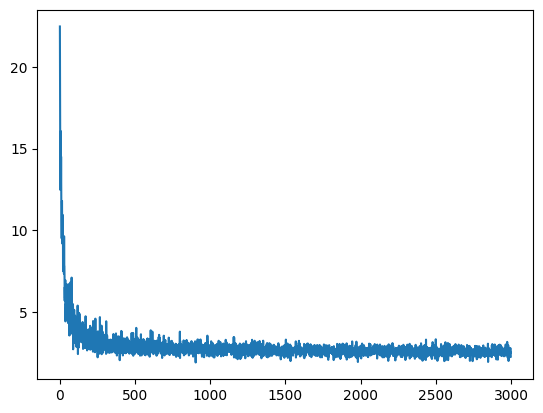

In [ ]:

# plt.plot(log(np.array(lossi)))
plt.plot(lossi)

In [ ]:
# Evaluate in the validation set (is the model overfitting?)
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 4) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.5805, grad_fn=<NllLossBackward0>)

In [ ]:
# Samplimg from the model
g = torch.Generator().manual_seed(2461359)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

ani.
sarani.
anniseethiyteaydhie.
aditeedspiiana.
asinaaysayseryha.
ia.
lhie.
jayrhi.
alieh.
ana.
ceysan.
yy.
ana.
ez.
ceia.
ay.
zaryastase.
mia.
eelin.
atethjaigaiasaryn.
